In [1]:
import json

# Đọc file GeoJSON
with open('gadm41_VNM_3.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

# Lọc các feature có tỉnh là Yên Bái hoặc Lào Cai
target_provinces = ['YênBái', 'LàoCai']

filtered_features = [
    feature for feature in data['features']
    if feature['properties'].get('NAME_1') in target_provinces
]

# In ra kết quả (ví dụ: tên xã và tỉnh)
for feature in filtered_features:
    print(f"{feature['properties']['NAME_3']} - {feature['properties']['NAME_1']}")


BắcHà - LàoCai
BảnCái - LàoCai
BảnGià - LàoCai
BảnLiền - LàoCai
BảnPhố - LàoCai
BảoNhai - LàoCai
CốcLầu - LàoCai
CốcLy - LàoCai
HoàngThuPhố - LàoCai
LầuThíNgài - LàoCai
LùngCải - LàoCai
LùngPhình - LàoCai
NaHối - LàoCai
NậmĐét - LàoCai
NậmKhánh - LàoCai
NậmLúc - LàoCai
NậmMòn - LàoCai
TàChải - LàoCai
TảCủTỷ - LàoCai
TảVanChư - LàoCai
ThảiGiàngPhố - LàoCai
BảnCầm - LàoCai
BảnPhiệt - LàoCai
GiaPhú - LàoCai
N.TPhongHải - LàoCai
PhốLu(Thịtrấn) - LàoCai
PhốLu(Xã) - LàoCai
PhongNiên - LàoCai
PhúNhuận - LàoCai
SơnHà - LàoCai
SơnHải - LàoCai
TằngLoỏng - LàoCai
TháiNiên - LàoCai
TrìQuang - LàoCai
XuânGiao - LàoCai
XuânQuang - LàoCai
BảoHà - LàoCai
CamCọn - LàoCai
ĐiệnQuan - LàoCai
KimSơn - LàoCai
LongKhánh - LàoCai
LongPhúc - LàoCai
LươngSơn - LàoCai
MinhTân - LàoCai
NghĩaĐô - LàoCai
PhốRàng - LàoCai
TânDương - LàoCai
TânTiến - LàoCai
ThượngHà - LàoCai
ViệtTiến - LàoCai
VĩnhYên - LàoCai
XuânHoà - LàoCai
XuânThượng - LàoCai
YênSơn - LàoCai
ALù - LàoCai
AMúSung - LàoCai
BảnQua - LàoCai
BảnVược - 

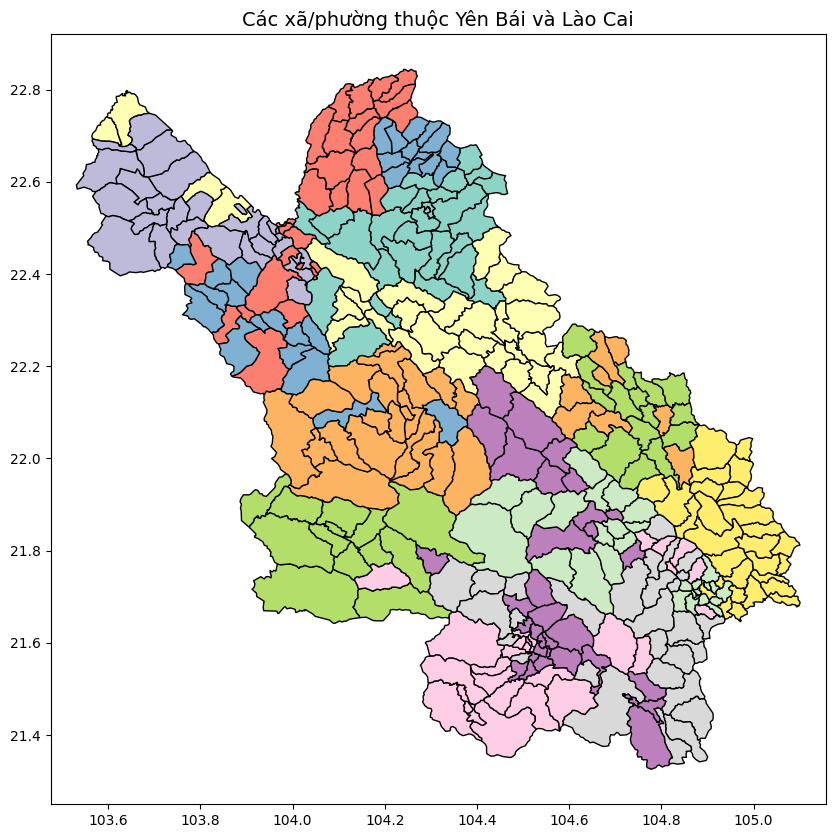

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Đọc toàn bộ GeoJSON
gdf = gpd.read_file('gadm41_VNM_3.json')

# Lọc các tỉnh cần vẽ: Yên Bái và Lào Cai
target_provinces = ['YênBái', 'LàoCai']
gdf_filtered = gdf[gdf['NAME_1'].isin(target_provinces)]

# Vẽ bản đồ
fig, ax = plt.subplots(figsize=(10, 10))
gdf_filtered.plot(ax=ax, cmap='Set3', edgecolor='black')

# # Gắn nhãn từng đơn vị hành chính (xã/phường)
# gdf_filtered.apply(lambda x: ax.annotate(text=x['NAME_3'], xy=x.geometry.centroid.coords[0], fontsize=8), axis=1)

# Tùy chỉnh
ax.set_title("Các xã/phường thuộc Yên Bái và Lào Cai", fontsize=14)
plt.axis('equal')
plt.show()


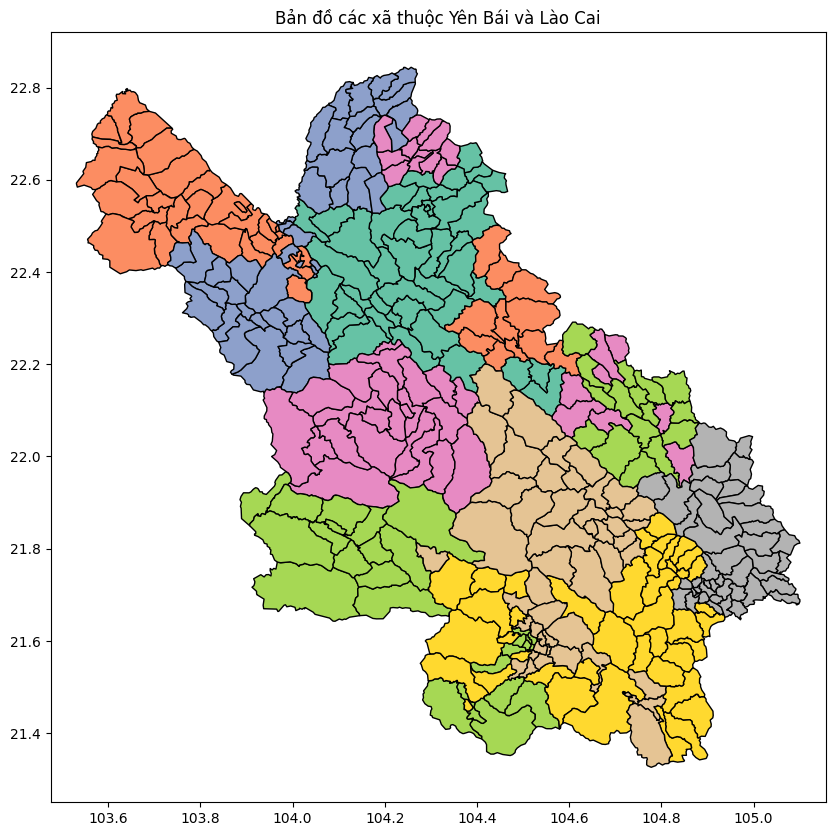

In [4]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Đọc GeoJSON
gdf = gpd.read_file('gadm41_VNM_3.json')

# Lọc các tỉnh Yên Bái và Lào Cai
target_provinces = ['YênBái', 'LàoCai']
gdf_filtered = gdf[gdf['NAME_1'].isin(target_provinces)]

# Vẽ bản đồ
gdf_filtered.plot(figsize=(10, 10), edgecolor='black', cmap='Set2')

plt.title('Bản đồ các xã thuộc Yên Bái và Lào Cai')
plt.axis('equal')
plt.show()


In [6]:
import geopandas as gpd
import folium

# Đọc GeoJSON
gdf = gpd.read_file('gadm41_VNM_3.json')

# Lọc các xã/phường thuộc tỉnh Yên Bái và Lào Cai
target_provinces = ['YênBái', 'LàoCai']
gdf_filtered = gdf[gdf['NAME_1'].isin(target_provinces)]

# Lấy trung tâm của toàn bộ vùng để làm tâm bản đồ
center = gdf_filtered.geometry.unary_union.centroid.coords[:][0][::-1]

# Tạo bản đồ Folium
m = folium.Map(location=center, zoom_start=8, tiles='cartodbpositron')

# Tạo GeoJson layer tương tác
folium.GeoJson(
    gdf_filtered,
    name="Xã/phường",
    style_function=lambda feature: {
        'fillColor': 'lightblue',
        'color': 'black',
        'weight': 1,
        'fillOpacity': 0.4,
    },
    tooltip=folium.GeoJsonTooltip(fields=['NAME_3'], aliases=['Xã/phường:']),
).add_to(m)

# Hiển thị bản đồ
m.save('map_yenbai_laocai.html')
m


C:\Users\PC\AppData\Local\Temp\ipykernel_1520\1727142498.py:12: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  center = gdf_filtered.geometry.unary_union.centroid.coords[:][0][::-1]


In [7]:
import geopandas as gpd

# Đọc file GeoJSON
gdf = gpd.read_file('gadm41_VNM_3.json')

# Lọc các xã/phường thuộc tỉnh Yên Bái và Lào Cai
target_provinces = ['Yên Bái', 'Lào Cai']
gdf_filtered = gdf[gdf['NAME_1'].isin(target_provinces)]

# Lưu kết quả vào file GeoJSON mới
gdf_filtered.to_file('yenbai_laocai.json', driver='GeoJSON')
